# **Тема 3. Применение условных вероятностей в анализе данных**
На некотором наборе данных (выбрать самостоятельно, можно: https://www.kaggle.com/datasets) продемонстрировать применение условных вероятностей (см. пример с рейтингом автомобилей по типу кузова, Notebook с примером "Титаника"). Рассматриваемый набор данных необходимо описать (назначение, описание признаков).


Выбран [следующий датасет](https://www.kaggle.com/datasets/miadul/covid-19-patient-symptoms-and-diagnosis-dataset?resource=download)

## **Пример на данных о симптомах и диагнозе COVID-19**

### **Описание данных**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls

sample_data


In [5]:
df = pd.read_csv('covid19_patient_symptoms_diagnosis.csv')
print("Размерность данных:", df.shape)

Размерность данных: (5000, 18)


In [6]:
df.head()

,patient_id,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,1,52,Male,1,0,1,1,0,0,0,0,98,37.1,Diabetes,0,0,0,0
1,2,15,Male,0,0,0,1,1,0,0,0,85,37.7,Diabetes,0,1,0,0
2,3,72,Male,1,0,1,0,0,1,0,1,99,36.8,NaN,0,0,0,0
3,4,61,Female,0,0,1,1,1,0,1,1,86,36.0,NaN,1,0,0,0
4,5,21,Female,1,1,0,0,0,1,0,1,90,36.4,NaN,1,1,1,1


In [7]:
print("Столбцы:", df.columns.tolist())

Столбцы: ['patient_id', 'age', 'gender', 'fever', 'dry_cough', 'sore_throat', 'fatigue', 'headache', 'shortness_of_breath', 'loss_of_smell', 'loss_of_taste', 'oxygen_level', 'body_temperature', 'comorbidity', 'travel_history', 'contact_with_patient', 'chest_pain', 'covid_result']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   fever                 5000 non-null   int64  
 4   dry_cough             5000 non-null   int64  
 5   sore_throat           5000 non-null   int64  
 6   fatigue               5000 non-null   int64  
 7   headache              5000 non-null   int64  
 8   shortness_of_breath   5000 non-null   int64  
 9   loss_of_smell         5000 non-null   int64  
 10  loss_of_taste         5000 non-null   int64  
 11  oxygen_level          5000 non-null   int64  
 12  body_temperature      5000 non-null   float64
 13  comorbidity           2275 non-null   object 
 14  travel_history        5000 non-null   int64  
 15  contact_with_patient 

In [12]:
description_info = {
    'Признак': [
        'patient_id', 'age', 'gender', 'fever', 'dry_cough', 'sore_throat',
        'fatigue', 'headache', 'shortness_of_breath', 'loss_of_smell',
        'loss_of_taste', 'oxygen_level', 'body_temperature', 'comorbidity',
        'travel_history', 'contact_with_patient', 'chest_pain', 'covid_result'
    ],
    'Тип': [
        'Числовой', 'Числовой', 'Категориальный', 'Бинарный', 'Бинарный', 'Бинарный',
        'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный',
        'Бинарный', 'Числовой', 'Числовой', 'Категориальный',
        'Бинарный', 'Бинарный', 'Бинарный', 'Бинарный'
    ],
    'Описание': [
        'Уникальный ID пациента',
        'Возраст пациента в годах',
        'Пол пациента (Male / Female)',
        'Наличие лихорадки',
        'Наличие сухого кашля',
        'Наличие боли в горле',
        'Наличие усталости',
        'Наличие головной боли',
        'Наличие одышки',
        'Наличие потери обоняния',
        'Наличие потери вкуса',
        'Уровень насыщения крови кислородом (SpO2, %)',
        'Температура тела (°C)',
        'Наличие сопутствующих заболеваний (Diabetes, Asthma, Heart Disease, None)',
        'Наличие истории путешествий',
        'Контакт с подтвержденным пациентом',
        'Наличие боли в груди',
        'Результат теста на COVID-19 (0 – отрицательный, 1 – положительный)'
    ],
    'Проблемы': [
        'Неинформативен для модели',
        '–',
        '–',
        '–',
        '–',
        '–',
        '–',
        '–',
        '–',
        '–',
        '–',
        'Выбросы; нормальный диапазон ~95-100%',
        'Выбросы; нормальная температура ~36.5-37.5°C',
        'Много категорий; требует кодирования',
        '–',
        '–',
        '–',
        'Целевая переменная'
    ]
}

df_description = pd.DataFrame(description_info)
df_description

,Признак,Тип,Описание,Проблемы
0,patient_id,Числовой,Уникальный ID пациента,Неинформативен для модели
1,age,Числовой,Возраст пациента в годах,–
2,gender,Категориальный,Пол пациента (Male / Female),–
3,fever,Бинарный,Наличие лихорадки,–
4,dry_cough,Бинарный,Наличие сухого кашля,–
5,sore_throat,Бинарный,Наличие боли в горле,–
6,fatigue,Бинарный,Наличие усталости,–
7,headache,Бинарный,Наличие головной боли,–
8,shortness_of_breath,Бинарный,Наличие одышки,–
9,loss_of_smell,Бинарный,Наличие потери обоняния,–


Первично проанализируем связь между потерей обоняния (loss_of_smell) и потерей вкуса (loss_of_taste) на основе сводной таблицы. Эта пара симптомов была одним из самых характерных признаков COVID-19 в начале пандемии.

In [14]:
pivot = pd.pivot_table(
    df,
    values='loss_of_taste',
    index=['loss_of_smell'],
    aggfunc='mean',
    fill_value=0
)
pivot.columns = ['Доля с потерей вкуса']
pivot.index = ['Без потери обоняния', 'С потерей обоняния']
pivot = pivot.round(4)

pivot_reverse = pd.pivot_table(
    df,
    values='loss_of_smell',
    index=['loss_of_taste'],
    aggfunc='mean',
    fill_value=0
)
pivot_reverse.columns = ['Доля с потерей обоняния']
pivot_reverse.index = ['Без потери вкуса', 'С потерей вкуса']
pivot_reverse = pivot_reverse.round(4)

display(pivot)
print()
display(pivot_reverse)

,Доля с потерей вкуса
Без потери обоняния,0.2955
С потерей обоняния,0.2866


,Доля с потерей обоняния
Без потери вкуса,0.302
С потерей вкуса,0.293


Т.е. наличие одного симптома практически не влияет на вероятность наличия другого — можно скачать, что они независимы в рамках этой выборки.

### **Простые вероятности**

In [17]:
# P(covid_result = 1) - общая вероятность наличия COVID-19 у осмотренных пациентов
P_Covid = df['covid_result'].mean()
print(f"P(Covid) = {P_Covid:.3f}")

P(Covid) = 0.520


In [18]:
# Вероятность возраста ≥ 65 лет (группа повышенного риска)
P_elderly = (df['age'] >= 65).mean()
print(f"P(age ≥ 65) = {P_elderly:.3f}")

P(age ≥ 65) = 0.263


In [19]:
# Вероятность наличия сопутствующих заболеваний (не "None")
P_comorbidity = (df['comorbidity'] != 'None').mean()
print(f"P(comorbidity ≠ None) = {P_comorbidity:.3f}")

P(comorbidity ≠ None) = 1.000


### **Условные вероятности**

Рассмотрим вероятность положительного результата теста на COVID-19 у пациента с наличием одышки.

In [22]:
# Способом 1
# Количество пациентов с одышкой
P_Shortness_of_Breath = (df['shortness_of_breath'] == 1).mean()

# Количество пациентов с одышкой И положительным результатом
P_Shortness_of_Breath_and_CovidPositive = ((df['shortness_of_breath'] == 1) & (df['covid_result'] == 1)).mean()

# Расчет условной вероятности
P_CovidPositive_if_Shortness_of_Breath = P_Shortness_of_Breath_and_CovidPositive / P_Shortness_of_Breath

print(f"P(CovidPositive | Shortness of Breath), рассчитанная вручную: {P_CovidPositive_if_Shortness_of_Breath:.3f}")

P(CovidPositive | Shortness of Breath), рассчитанная вручную: 0.738


In [23]:
# Способом 2
# Фильтруем датфрейм: оставляем только тех, у кого есть одышка
patients_with_shortness = df[df['shortness_of_breath'] == 1]

# Рассчитываем долю положительных результатов среди них
P_P_CovidPositive_if_Shortness_of_Breath = patients_with_shortness['covid_result'].mean()

print(f"P(CovidPositive | Shortness of Breath), рассчитанная через фильтр: {P_P_CovidPositive_if_Shortness_of_Breath:.3f}")

P(CovidPositive | Shortness of Breath), рассчитанная через фильтр: 0.738


Воспользуемся обобщенной функцией вычисления условных вероятней.

In [24]:
def conditional_probability(df, condition_col, condition_val, target_col='covid_result', target_val=1):
    """
    df: pandas.DataFrame - исходный датафрейм
    condition_col: str - имя колонки условия
    condition_val: int/str - значение условия
    target_col: str - имя целевой колонки (по умолчанию 'covid_result')
    target_val: int - значение целевого события (по умолчанию 1, что означает положительный результат)
    """

    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

In [25]:
print("УСЛОВНЫЕ ВЕРОЯТНОСТИ ПОЛОЖИТЕЛЬНОГО РЕЗУЛЬТАТА:")
print("=" * 50)

# 1. По полу
print("\nПо полу:")
for sex in df['gender'].unique():
    prob = conditional_probability(df, 'gender', sex, 'covid_result', 1)
    print(f"  P(covid_result=1 | gender={sex}) = {prob:.3f}")

# 2. По возрастным группам
bins = [0, 17, 40, 60, 100]
labels = ['0-17', '18-40', '41-60', '>60']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print("\nПо возрастной группе:")
for age_group in df['age_group'].dropna().unique():
    prob = conditional_probability(df, 'age_group', age_group, 'covid_result', 1)
    print(f"  P(covid_result=1 | age_group={age_group}) = {prob:.3f}")

# 3. По уровню кислорода
df['oxygen_group'] = df['oxygen_level'].apply(lambda x: 'low' if x <= 95 else 'normal')
print("\nПо уровню кислорода:")
for oxy_group in df['oxygen_group'].unique():
    prob = conditional_probability(df, 'oxygen_group', oxy_group, 'covid_result', 1)
    print(f"  P(covid_result=1 | oxygen_level={oxy_group}) = {prob:.3f}")

УСЛОВНЫЕ ВЕРОЯТНОСТИ ПОЛОЖИТЕЛЬНОГО РЕЗУЛЬТАТА:

По полу:
  P(covid_result=1 | gender=Male) = 0.525
  P(covid_result=1 | gender=Female) = 0.515

По возрастной группе:
  P(covid_result=1 | age_group=41-60) = 0.515
  P(covid_result=1 | age_group=0-17) = 0.513
  P(covid_result=1 | age_group=>60) = 0.528
  P(covid_result=1 | age_group=18-40) = 0.519

По уровню кислорода:
  P(covid_result=1 | oxygen_level=normal) = 0.359
  P(covid_result=1 | oxygen_level=low) = 0.577


### **Формула полной вероятности**

>Задача: вычислить общую вероятность положительного результата теста на COVID-19 (covid_result = 1), разложив её по возрастным группам (0–17, 18–40, 41–60, >60 лет), чтобы учесть различия в риске заражения между возрастными категориями.

In [29]:
bins = [0, 17, 40, 60, 100]
labels = ['0–17', '18–40', '41–60', '>60']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print("ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:")
print("P(covid_result=1) = Σ P(covid_result=1 | age_group=i) ⋅ P(age_group=i)")
print("=" * 60)

total_prob = 0
prob_details = []

for age_group in labels:
    # P(age_group = i)
    P_age = (df['age_group'] == age_group).mean()

    if P_age == 0:
        continue  # пропускаем пустые группы

    # P(covid_result = 1 | age_group = i)
    P_covid_given_age = (df[df['age_group'] == age_group]['covid_result'] == 1).mean()

    # Вклад группы в общую вероятность
    contribution = P_covid_given_age * P_age
    total_prob += contribution

    prob_details.append({
        'Возрастная группа': age_group,
        'P(Группа)': P_age,
        'P(COVID|Группа)': P_covid_given_age,
        'Вклад': contribution
    })

prob_df = pd.DataFrame(prob_details)
print(prob_df.round(4))
print()

P_covid_direct = df['covid_result'].mean()
print(f"Общая P(COVID), по формуле полной вероятности: {total_prob:.4f}")
print(f"Общая P(COVID), напрямую из данных:            {P_covid_direct:.4f}")

ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ:
P(covid_result=1) = Σ P(covid_result=1 | age_group=i) ⋅ P(age_group=i)
  Возрастная группа  P(Группа)  P(COVID|Группа)   Вклад
0              0–17     0.1806           0.5127  0.0926
1             18–40     0.2700           0.5193  0.1402
2             41–60     0.2238           0.5147  0.1152
3               >60     0.3256           0.5283  0.1720

Общая P(COVID), по формуле полной вероятности: 0.5200
Общая P(COVID), напрямую из данных:            0.5200


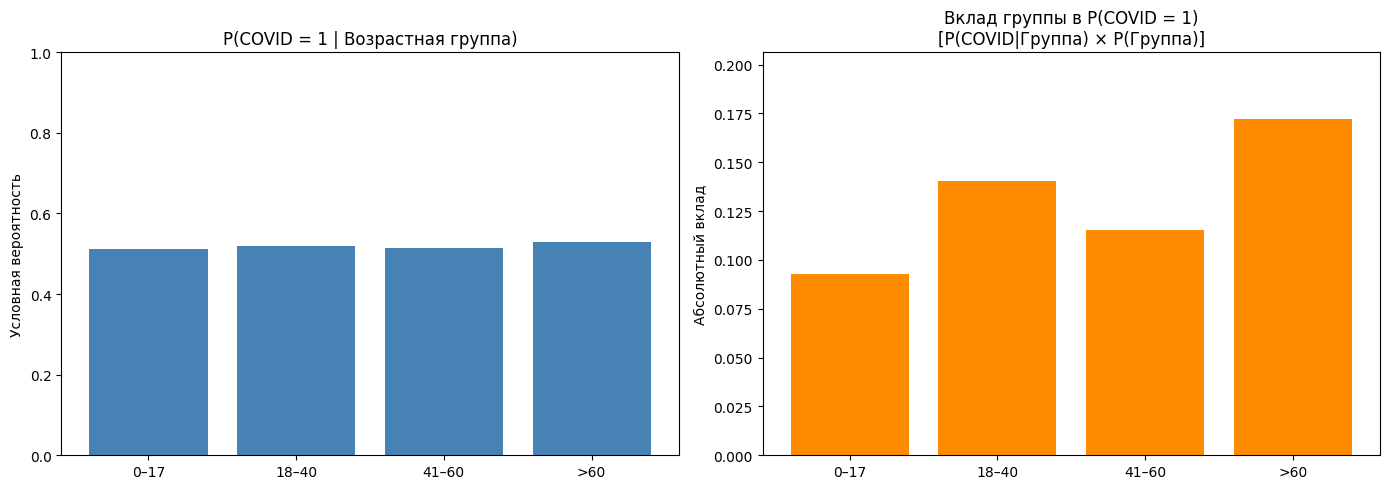

In [30]:
># Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Условные вероятности по группам
ax1.bar(prob_df['Возрастная группа'], prob_df['P(COVID|Группа)'], color='steelblue')
ax1.set_title('P(COVID = 1 | Возрастная группа)')
ax1.set_ylabel('Условная вероятность')
ax1.set_ylim(0, 1)

# Вклад каждой группы
ax2.bar(prob_df['Возрастная группа'], prob_df['Вклад'], color='darkorange')
ax2.set_title('Вклад группы в P(COVID = 1)\n[P(COVID|Группа) × P(Группа)]')
ax2.set_ylabel('Абсолютный вклад')
ax2.set_ylim(0, max(prob_df['Вклад']) * 1.2)

plt.tight_layout()
plt.show()

### **Формула Байеса**

> **Задача:**
 у пациента положительный тест на COVID-19 (covid_result = 1). Нам неизвестны его сопутствующие заболевания. Мы хотим определить, с какой вероятностью у него присутствует каждое из них (Diabetes, Asthma, Heart Disease) или их отсутствие (None).

In [39]:
print("ТЕОРЕМА БАЙЕСА:")
print("P(comorbidity | covid_result=1) = [P(covid_result=1 | comorbidity) × P(comorbidity)] / P(covid_result=1)")
print("=" * 70)

# === ИСПРАВЛЕНИЕ: Очистка столбца comorbidity ===
# Приводим всё к строкам и заменяем 'nan' на 'None'
df['comorbidity'] = df['comorbidity'].astype(str)
df['comorbidity'] = df['comorbidity'].replace('nan', 'None')
# Также уберём возможные пробелы
df['comorbidity'] = df['comorbidity'].str.strip()

# P(covid_result=1) — знаменатель (полная вероятность)
P_covid = df['covid_result'].mean()

bayes_comorb = []

# Теперь можно безопасно брать уникальные значения и сортировать
for comorb in sorted(df['comorbidity'].unique()):
    # P(comorbidity = X) — априорная вероятность
    P_comorb = (df['comorbidity'] == comorb).mean()

    # P(covid_result=1 | comorbidity = X) — правдоподобие
    P_covid_given_comorb = conditional_probability(df, 'comorbidity', comorb, 'covid_result', 1)

    # Применяем теорему Байеса
    if P_covid > 0:
        P_comorb_given_covid = (P_covid_given_comorb * P_comorb) / P_covid
    else:
        P_comorb_given_covid = 0

    bayes_comorb.append({
        'Коморбидность': comorb,
        'P(Коморбидность)': P_comorb,
        'P(COVID|Коморбидность)': P_covid_given_comorb,
        'P(Коморбидность|COVID)': P_comorb_given_covid
    })

# Создаём DataFrame
bayes_df = pd.DataFrame(bayes_comorb).sort_values('P(Коморбидность|COVID)', ascending=False)
print(bayes_df.round(4))
print()

print(f"Общая P(COVID) = {P_covid:.4f}")
print(f"Сумма апостериорных вероятностей: {bayes_df['P(Коморбидность|COVID)'].sum():.4f}")

ТЕОРЕМА БАЙЕСА:
P(comorbidity | covid_result=1) = [P(covid_result=1 | comorbidity) × P(comorbidity)] / P(covid_result=1)
   Коморбидность  P(Коморбидность)  P(COVID|Коморбидность)  \
3           None            0.5450                  0.5295   
1       Diabetes            0.2002                  0.5095   
2  Heart Disease            0.1584                  0.4987   
0         Asthma            0.0964                  0.5228   

   P(Коморбидность|COVID)  
3                  0.5550  
1                  0.1962  
2                  0.1519  
0                  0.0969  

Общая P(COVID) = 0.5200
Сумма апостериорных вероятностей: 1.0000


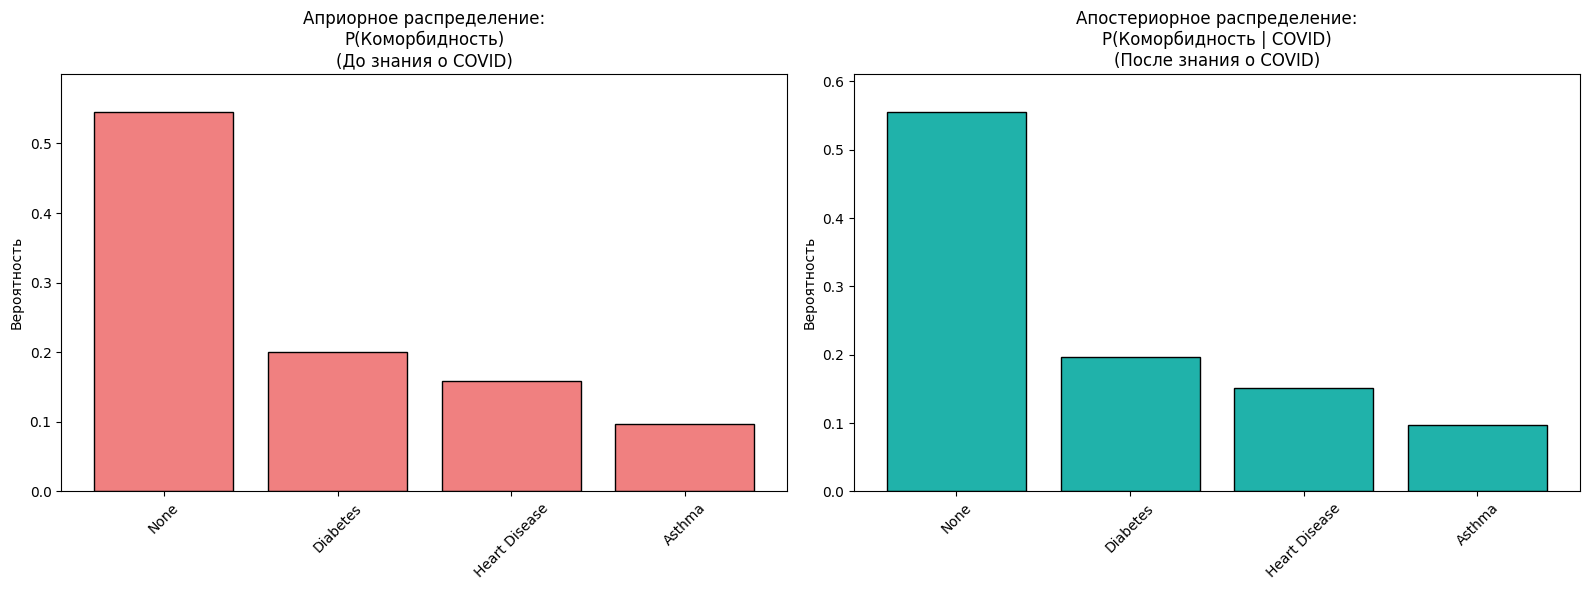

In [40]:
# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Априорное распределение
ax1.bar(bayes_df['Коморбидность'], bayes_df['P(Коморбидность)'], color='lightcoral', edgecolor='black')
ax1.set_title('Априорное распределение:\nP(Коморбидность)\n(До знания о COVID)')
ax1.set_ylabel('Вероятность')
ax1.set_ylim(0, max(bayes_df['P(Коморбидность)']) * 1.1)
ax1.tick_params(axis='x', rotation=45)

# Апостериорное распределение
ax2.bar(bayes_df['Коморбидность'], bayes_df['P(Коморбидность|COVID)'], color='lightseagreen', edgecolor='black')
ax2.set_title('Апостериорное распределение:\nP(Коморбидность | COVID)\n(После знания о COVID)')
ax2.set_ylabel('Вероятность')
ax2.set_ylim(0, max(bayes_df['P(Коморбидность|COVID)']) * 1.1)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()